# Titanic disaster analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

## Data Description

Load the data in two dataframes using pandas

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Get the overview and stucture of the data for better understanding

In [3]:
# Attributes of the training data
train.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [4]:
# A look into content of the first few entries
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# A look into dtypes of the columns and number of non-null entries
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# Qyantitative description of data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Taussig, Miss. Ruth",male,1601,G6,S
freq,1,577,7,4,644


**Now we know that tere are 12 columns and 891 entries in training data. Notice that there are some missing entries for some of the columns that we have to deal with, but first let us do some data analysis on training data to get better understading of the dataset and also about the passengers on the titanic.**

## Exploratory Data Analysis

### Analysis using Passenger Class

Some usefull insights

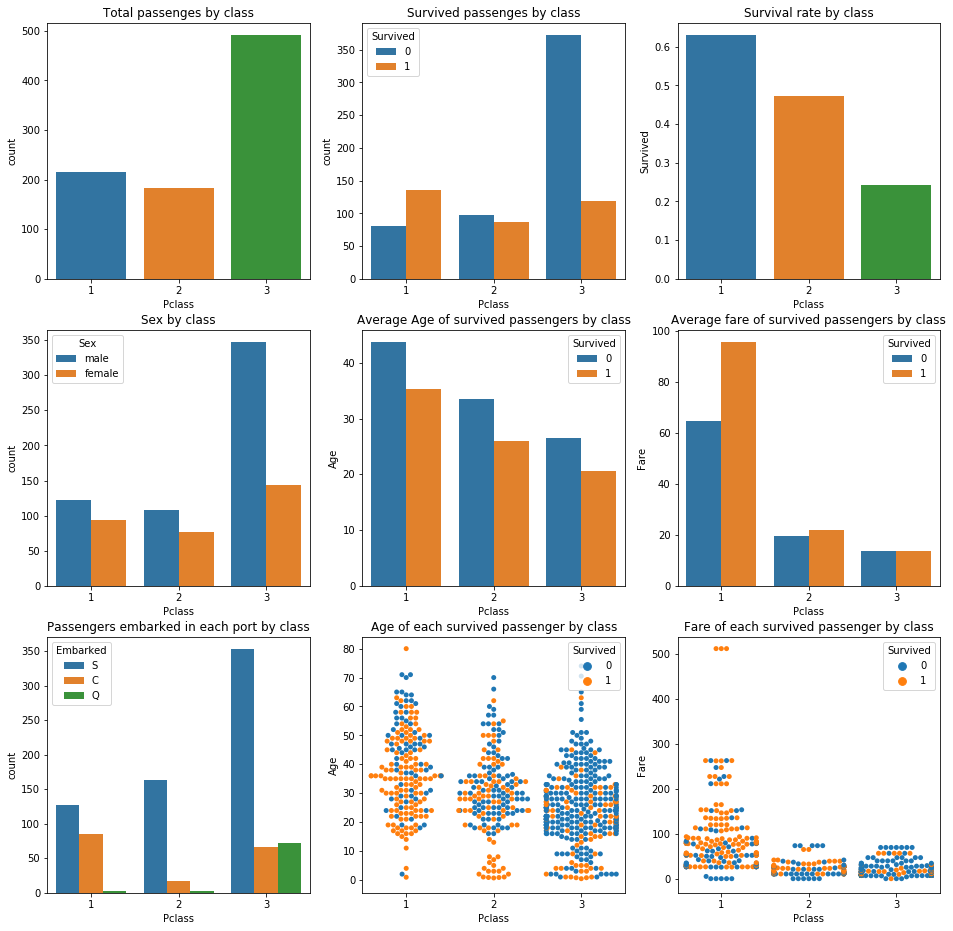

In [8]:
f,ax = plt.subplots(3,3,figsize=(16,16))
sns.countplot('Pclass',data=train, ax=ax[0,0])
sns.countplot('Pclass',hue='Survived', data=train, ax=ax[0,1])
sns.countplot('Pclass',hue='Sex', data=train, ax=ax[1,0])
sns.barplot(x="Pclass", y="Survived",data=train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean(), ax=ax[0,2])
sns.barplot(x="Pclass", y="Age", hue="Survived",data=train[["Pclass", "Age", "Survived"]].groupby(["Pclass", "Survived"], as_index=False).mean(), ax=ax[1,1])
sns.barplot(x="Pclass", y="Fare", hue="Survived",data=train[["Pclass", "Fare", "Survived"]].groupby(["Pclass", "Survived"], as_index=False).mean(), ax=ax[1,2])
sns.swarmplot(x="Pclass", y="Age", hue="Survived", data=train, ax=ax[2,1])
sns.swarmplot(x="Pclass", y="Fare", hue="Survived", data=train, ax=ax[2,2])
sns.countplot('Pclass',hue='Embarked', data=train, ax=ax[2,0])
ax[0,0].set_title("Total passenges by class")
ax[0,1].set_title("Survived passenges by class")
ax[0,2].set_title("Survival rate by class")
ax[1,0].set_title("Sex by class")
ax[1,1].set_title("Average Age of survived passengers by class")
ax[1,2].set_title("Average fare of survived passengers by class")
ax[2,0].set_title("Passengers embarked in each port by class")
ax[2,1].set_title("Age of each survived passenger by class")
ax[2,2].set_title("Fare of each survived passenger by class")

**Total passengers by class:** Number of passengers travelled in each class.

**Survived passengers by class:** Number of passengers survived, deceased in each class

**Survival rate by class:** Percent of passengers survived in each class

**Sex by class:** Number of males/females in each class

**Average Age of survived passengers by class:** Average age of passengers survived, deceased in each class

**Average Fare of survived passengers by class:** Average fare of passengers survived, deceased in each class

**Passengers embarked in each port by class:** Number of passengers embarked from each port on to the ship in each class

**Age of each survived passenger by class:** age of each passenger divided into survived/deceased with in each class

**Fare of each survived passenger by class:** Fare of each passenger divided into survived/deceased with in each class

### Analysis using Passenger Sex

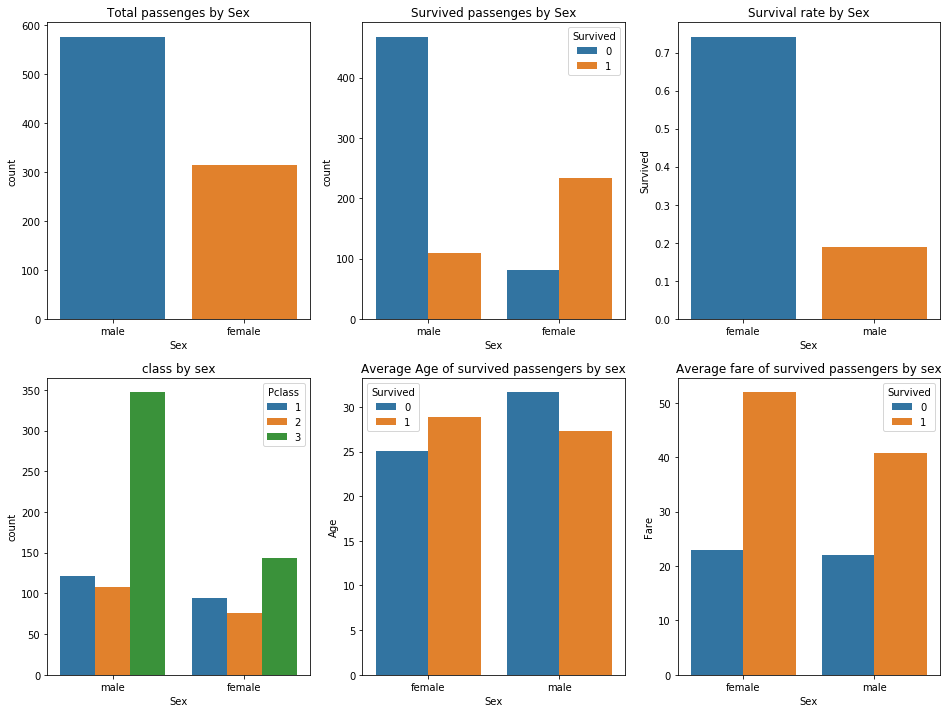

In [9]:
f,ax = plt.subplots(2,3,figsize=(16,12))
sns.countplot('Sex',data=train, ax=ax[0,0])
sns.countplot('Sex',hue='Survived', data=train, ax=ax[0,1])
sns.countplot('Sex',hue='Pclass', data=train, ax=ax[1,0])
sns.barplot(x="Sex", y="Survived",data=train[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean(), ax=ax[0,2])
sns.barplot(x="Sex", y="Age", hue="Survived",data=train[["Sex", "Age", "Survived"]].groupby(["Sex", "Survived"], as_index=False).mean(), ax=ax[1,1])
sns.barplot(x="Sex", y="Fare", hue="Survived",data=train[["Sex", "Fare", "Survived"]].groupby(["Sex", "Survived"], as_index=False).mean(), ax=ax[1,2])

ax[0,0].set_title("Total passenges by Sex")
ax[0,1].set_title("Survived passenges by Sex")
ax[0,2].set_title("Survival rate by Sex")
ax[1,0].set_title("class by sex")
ax[1,1].set_title("Average Age of survived passengers by sex")
ax[1,2].set_title("Average fare of survived passengers by sex")

**Notable insights:** 

Survival rate among the female is much higher than male. Although There are around 600 men and 300 women, the number of survived women 200 is much higher than men 100.

Even though there is better survival chance for females. The average fare difference between survived(50) and deceased(25) women is high.

Average age of survived is women higher than deceased women and average age of survived men is lesser than deceased.

### Analysis using Age

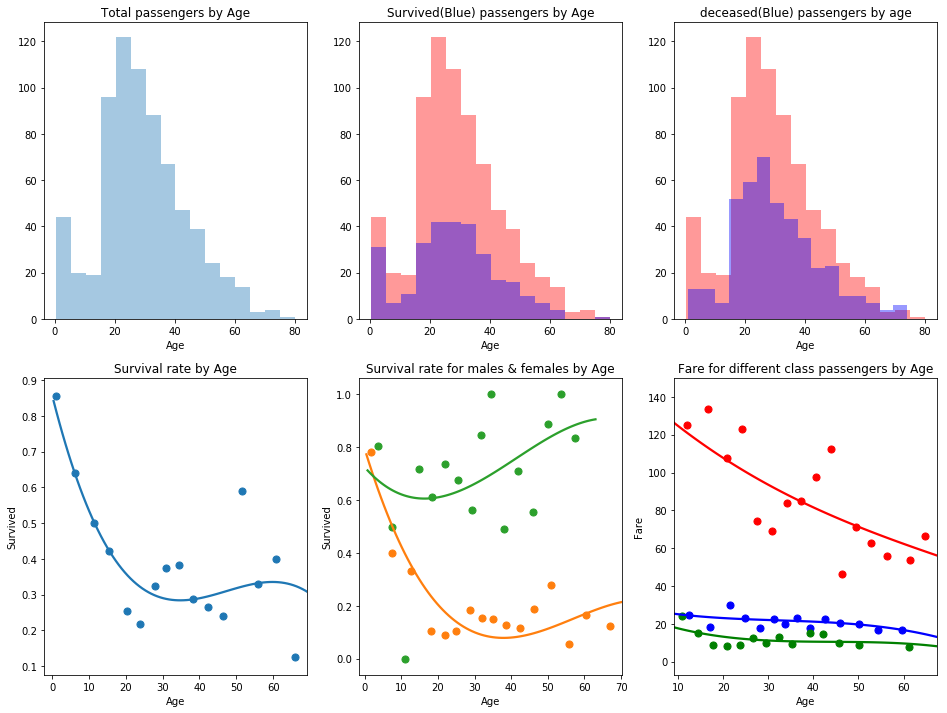

In [10]:
f,ax = plt.subplots(2,3,figsize=(16,12))

sns.distplot(train["Age"].dropna(),kde=False, ax=ax[0,0],bins=16)
sns.distplot(train["Age"].dropna(),kde=False, color='r', ax=ax[0,1],bins=16)
sns.distplot(train[train["Survived"]==1]["Age"].dropna(),kde=False, color='b', ax=ax[0,1],bins=16)
sns.distplot(train["Age"].dropna(),kde=False, color='r', ax=ax[0,2],bins=16)
sns.distplot(train[train["Survived"]==0]["Age"].dropna(),kde=False, color='b', ax=ax[0,2],bins=16)
sns.regplot(x="Age", y="Survived", data=train[["Age", "Survived"]].dropna().groupby(["Age"], as_index=False).mean(),x_bins=16, order=3, ci=None, truncate=True,ax=ax[1,0])
sns.regplot(x="Age", y="Survived", data=train[train["Sex"]=="male"][["Age", "Survived"]].dropna().groupby(["Age"], as_index=False).mean(),x_bins=16, order=3, ci=None, truncate=True,ax=ax[1,1])
sns.regplot(x="Age", y="Survived", data=train[train["Sex"]=="female"][["Age", "Survived"]].dropna().groupby(["Age"], as_index=False).mean(),x_bins=16, order=3, ci=None, truncate=True,ax=ax[1,1])
sns.regplot(x="Age", y="Fare", data=train[train["Pclass"]==1][["Age", "Fare"]].dropna().groupby(["Age"], as_index=False).mean(),x_bins=16, order=3, ci=None, truncate=True,ax=ax[1,2], color = 'r')
sns.regplot(x="Age", y="Fare", data=train[train["Pclass"]==2][["Age", "Fare"]].dropna().groupby(["Age"], as_index=False).mean(),x_bins=16, order=3, ci=None, truncate=True,ax=ax[1,2], color='b')
sns.regplot(x="Age", y="Fare", data=train[train["Pclass"]==3][["Age", "Fare"]].dropna().groupby(["Age"], as_index=False).mean(),x_bins=16, order=3, ci=None, truncate=True,ax=ax[1,2], color='g')

ax[0,0].set_title("Total passengers by Age")
ax[0,1].set_title("Survived(Blue) passengers by Age")
ax[0,2].set_title("deceased(Blue) passengers by age")
ax[1,0].set_title("Survival rate by Age")
ax[1,1].set_title("Survival rate for males & females by Age")
ax[1,2].set_title("Fare for different class passengers by Age")

**Notable insights:**

Survival rate among children and young passengers is higher.

Even though survival rate for women is higher than men, clearly survival rate among older women is higher than younger women.

Interestingly fare for the children is higher compared to adults particularly among 1st class passengers.

### Analysis using Fare

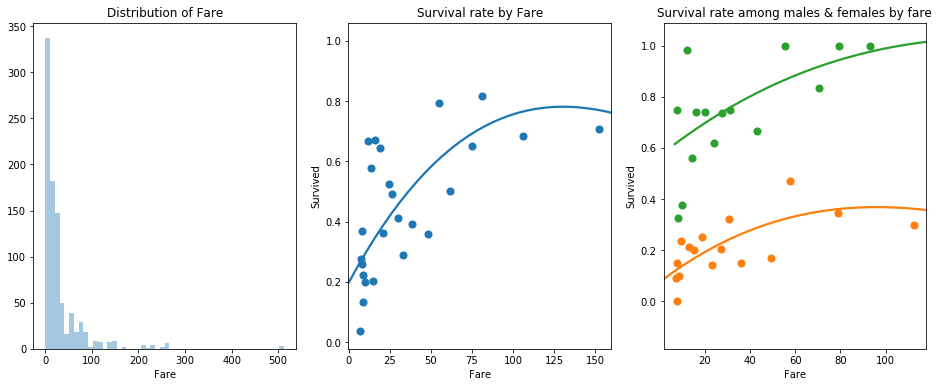

In [11]:
f,ax = plt.subplots(nrows=1, ncols=3,figsize=(16,6))

sns.distplot(train["Fare"].dropna(),kde=False, ax=ax[0],bins=50)
sns.regplot(x="Fare", y="Survived", data=train[["Fare", "Survived"]].dropna().groupby(["Fare"], as_index=False).mean(),x_bins=25, order=3, ci=None, truncate=True,ax=ax[1])
sns.regplot(x="Fare", y="Survived", data=train[train["Sex"]=="male"][["Fare", "Survived"]].dropna().groupby(["Fare"], as_index=False).mean(),x_bins=16, order=3, ci=None, truncate=True,ax=ax[2])
sns.regplot(x="Fare", y="Survived", data=train[train["Sex"]=="female"][["Fare", "Survived"]].dropna().groupby(["Fare"], as_index=False).mean(),x_bins=16, order=3, ci=None, truncate=True,ax=ax[2])

ax[0].set_title("Distribution of Fare")
ax[1].set_title("Survival rate by Fare")
ax[2].set_title("Survival rate among males & females by fare")

**Not a suprise to see survival rate going high as fare goes high.**

### Analysis using rest of features

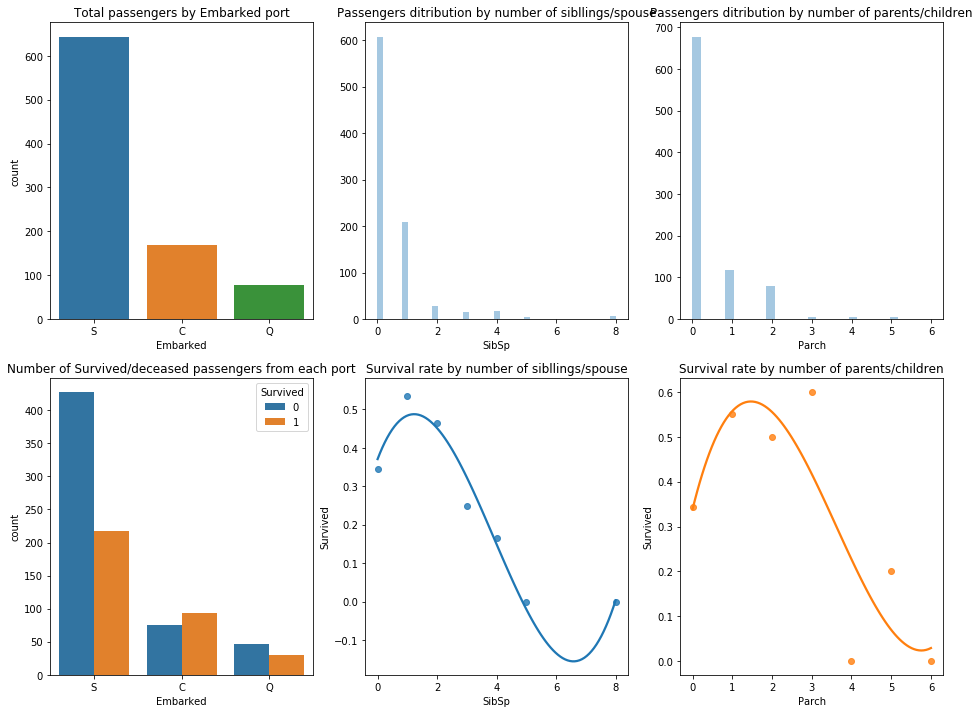

In [12]:
f,ax = plt.subplots(2,3,figsize=(16,12))

sns.countplot('Embarked',data=train, ax=ax[0,0])
sns.countplot('Embarked', hue="Survived",data=train, ax=ax[1,0])
sns.distplot(train["SibSp"].dropna(),kde=False, ax=ax[0,1])
sns.regplot(x="SibSp", y="Survived", data=train[["SibSp", "Survived"]].dropna().groupby(["SibSp"], as_index=False).mean(), order=3, ci=None, truncate=True,ax=ax[1,1])
sns.distplot(train["Parch"].dropna(),kde=False, ax=ax[0,2])
sns.regplot(x="Parch", y="Survived", data=train[["Parch", "Survived"]].dropna().groupby(["Parch"], as_index=False).mean(), order=3, ci=None, truncate=True,ax=ax[1,2])

ax[0,0].set_title("Total passengers by Embarked port")
ax[0,1].set_title("Passengers ditribution by number of sibllings/spouse")
ax[0,2].set_title("Passengers ditribution by number of parents/children")
ax[1,0].set_title("Number of Survived/deceased passengers from each port")
ax[1,1].set_title("Survival rate by number of sibllings/spouse")
ax[1,2].set_title("Survival rate by number of parents/children")

Survival rate among the small family group of 2,3 is higher than singles.

## Feature Engineering

### Name

The name of the passengers is not used in any form to generalize, because each passenger has his own name but we can get title out of the passengers name so that we can get some more information about the passenger.

In [13]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

Let's check the number of Titles we got

In [14]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Lady          1
Mme           1
Sir           1
Capt          1
Ms            1
Jonkheer      1
Don           1
Name: Title, dtype: int64

We can replace all the less occured titles with others

In [15]:
train["Title"] = train["Title"].replace(["Dr", "Rev", "Major", "Col", "Mlle", "Lady",
                                         "Jonkheer", "Ms", "Mme", "Capt", "Don", "Countess","Sir"], "Other")
test["Title"] = test["Title"].replace(["Dr", "Rev", "Major", "Col", "Mlle", "Lady",
                                         "Jonkheer", "Ms", "Mme", "Capt", "Don", "Countess","Sir", "Dona"], "Other")
train["Title"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Family

In [17]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = 0
train.loc[train['FamilySize']==1, 'IsAlone'] = 1

test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = 0
test.loc[test['FamilySize']==1, 'IsAlone'] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1


### Cabin

In [18]:
train["Deck"]=train["Cabin"].str[0]
train.loc[train["Deck"]=="T","Deck"] = "A"
train["Deck"].value_counts()

C    59
B    47
D    33
E    32
A    16
F    13
G     4
Name: Deck, dtype: int64

In [19]:
test["Deck"]=test["Cabin"].str[0]
test["Deck"].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Deck, dtype: int64

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,NaN


### Analysis for New Features

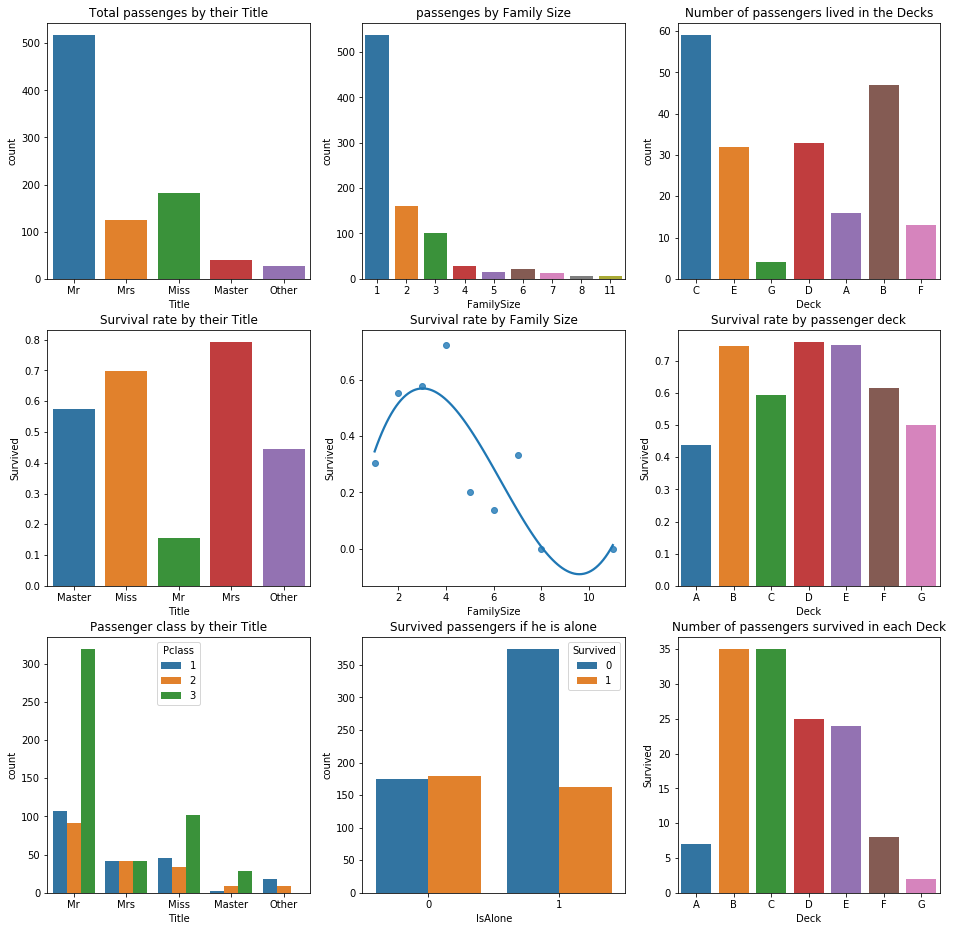

In [21]:
f,ax = plt.subplots(3,3,figsize=(16,16))

sns.countplot('Title',data=train, ax=ax[0,0])
sns.barplot(x="Title", y="Survived", data=train[["Title", "Survived"]].dropna().groupby(["Title"], as_index=False).mean(),ax=ax[1,0])
sns.countplot('Title',hue='Pclass', data=train, ax=ax[2,0])
sns.countplot('FamilySize', data=train, ax=ax[0,1])
sns.regplot(x="FamilySize", y="Survived", data=train[["FamilySize", "Survived"]].dropna().groupby(["FamilySize"], as_index=False).mean(), order=3, ci=None, truncate=True,ax=ax[1,1])
sns.countplot('IsAlone', hue="Survived", data=train, ax=ax[2,1])
sns.countplot('Deck',data=train, ax=ax[0,2])
sns.barplot(x="Deck", y="Survived", data=train[["Deck", "Survived"]].dropna().groupby(["Deck"], as_index=False).mean(),ax=ax[1,2])
sns.barplot(x='Deck', y="Survived", data=train[["Deck", "Survived"]].dropna().groupby(["Deck"], as_index=False).sum(), ax=ax[2,2])

ax[0,0].set_title("Total passenges by their Title")
ax[0,1].set_title("passenges by Family Size")
ax[0,2].set_title("Number of passengers lived in the Decks")
ax[1,0].set_title("Survival rate by their Title")
ax[1,1].set_title("Survival rate by Family Size")
ax[1,2].set_title("Survival rate by passenger deck")
ax[2,0].set_title("Passenger class by their Title")
ax[2,1].set_title("Survived passengers if he is alone")
ax[2,2].set_title("Number of passengers survived in each Deck")

### Drop unwanted coloumns

We can drop Name from the training data and also SibSp, Parch as we have family, isalone data.

We can drop Ticket info and cabin info.

In [22]:
train = train.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin"], axis=1)
passenger_id = test["PassengerId"]
test = test.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin"], axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Deck
0,0,3,male,22.0,7.2500,S,Mr,2,0,NaN
1,1,1,female,38.0,71.2833,C,Mrs,2,0,C
2,1,3,female,26.0,7.9250,S,Miss,1,1,NaN
3,1,1,female,35.0,53.1000,S,Mrs,2,0,C
4,0,3,male,35.0,8.0500,S,Mr,1,1,NaN


### Missing values

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null object
Age           714 non-null float64
Fare          891 non-null float64
Embarked      889 non-null object
Title         891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Deck          204 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


There are some missing values in Age, Embarked , Deck

First we will fill Embarked and deck missing values.

Most of the passengers were emberked in Southampton port so the 2 missing values can be filled with "S".

Missing Deck values will be made in to one category of Not Available "NA".

In [24]:
train['Embarked'].fillna('S',inplace=True)
train['Deck'].fillna('NA',inplace=True)

In [25]:
import statistics as stat
test['Fare'].fillna(stat.mode(test['Fare']),inplace=True)
test['Deck'].fillna('NA',inplace=True)

### Categorical data preparation

We need to change categorical data in to psudo labels for each category.

In [26]:
Sex_dict = {"female":0, "male":1}
Embarked_dict = {"S":0, "C":1, "Q":2}
Title_dict = {"Mr":0, "Mrs":1, "Miss":2, "Master":3, "Other":4}
Deck_dict = {"NA":0, "A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7}

train["Sex"] = [Sex_dict[x] for x in train["Sex"]]
train["Embarked"] = [Embarked_dict[x] for x in train["Embarked"]]
train["Title"] = [Title_dict[x] for x in train["Title"]]
train["Deck"] = [Deck_dict[x] for x in train["Deck"]]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Deck
0,0,3,1,22.0,7.2500,0,0,2,0,0
1,1,1,0,38.0,71.2833,1,1,2,0,3
2,1,3,0,26.0,7.9250,0,2,1,1,0
3,1,1,0,35.0,53.1000,0,1,2,0,3
4,0,3,1,35.0,8.0500,0,0,1,1,0


In [27]:
test["Sex"] = [Sex_dict[x] for x in test["Sex"]]
test["Embarked"] = [Embarked_dict[x] for x in test["Embarked"]]
test["Title"] = [Title_dict[x] for x in test["Title"]]
test["Deck"] = [Deck_dict[x] for x in test["Deck"]]
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Deck
0,3,1,34.5,7.8292,2,0,1,1,0
1,3,0,47.0,7.0000,0,1,2,0,0
2,2,1,62.0,9.6875,2,0,1,1,0
3,3,1,27.0,8.6625,0,0,1,1,0
4,3,0,22.0,12.2875,0,1,3,0,0


In [28]:
for dataset in [train,test]:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) , 'Age'] = 3
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Deck
0,0,3,1,1.0,7.2500,0,0,2,0,0
1,1,1,0,2.0,71.2833,1,1,2,0,3
2,1,3,0,1.0,7.9250,0,2,1,1,0
3,1,1,0,2.0,53.1000,0,1,2,0,3
4,0,3,1,2.0,8.0500,0,0,1,1,0


### Missing Age values

If we recall from data description above there are 177 missing values in age. We can take average of all ages and fill it but it wont be good generalization. So we are going to train a model to predict age for missing values.

In [29]:
from sklearn.preprocessing import MinMaxScaler
train_age = train.copy()
train_age = train_age.drop("Survived", axis=1)
train_age = pd.concat([train_age, test])
train_age = train_age.dropna(axis=0)
age_labels = train_age["Age"].astype(int)
train_age = train_age.drop(["Age", "Deck", "IsAlone", "Embarked"], axis=1)

In [30]:
train_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 415
Data columns (total 5 columns):
Pclass        1046 non-null int64
Sex           1046 non-null int64
Fare          1046 non-null float64
Title         1046 non-null int64
FamilySize    1046 non-null int64
dtypes: float64(1), int64(4)
memory usage: 49.0 KB


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_age,age_labels,random_state=25,test_size =0.30)

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(n_estimators=100,random_state=25, max_depth=5,
                                max_features='log2', learning_rate=0.01, subsample=0.3)
gbr.fit(X_train, y_train)
print("validation accuracy:",gbr.score(X_test, y_test))
print("training accuracy:",gbr.score(X_train, y_train))

validation accuracy: 0.62101910828
training accuracy: 0.695355191257


In [33]:
null_data = train[train.isnull().any(axis=1)]
null_data_age = null_data.drop(["Age", "Deck", "IsAlone", "Embarked", "Survived"], axis=1)
null_data["Age"] = gbr.predict(null_data_age)
train = train.dropna(axis=0)
train = pd.concat([train, null_data])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 888
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Deck          891 non-null int64
dtypes: float64(2), int64(8)
memory usage: 76.6 KB


C:\Users\Sai\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
null_data_t = test[test.isnull().any(axis=1)]
null_data_t_age = null_data_t.drop(["Age", "Deck", "IsAlone", "Embarked"], axis=1)
null_data_t["Age"] = gbr.predict(null_data_t_age)
test = test.dropna(axis=0)
test = pd.concat([test, null_data_t])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
Fare          418 non-null float64
Embarked      418 non-null int64
Title         418 non-null int64
FamilySize    418 non-null int64
IsAlone       418 non-null int64
Deck          418 non-null int64
dtypes: float64(2), int64(7)
memory usage: 32.7 KB


C:\Users\Sai\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Final data prep

In [35]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Deck
0,0,3,1,1.0,7.2500,0,0,2,0,0
1,1,1,0,2.0,71.2833,1,1,2,0,3
2,1,3,0,1.0,7.9250,0,2,1,1,0
3,1,1,0,2.0,53.1000,0,1,2,0,3
4,0,3,1,2.0,8.0500,0,0,1,1,0


In [36]:
Survived = train["Survived"]
train = train.drop(["Survived"], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train,Survived,random_state=25,test_size =0.30)

In [38]:
test.sort_index(inplace=True)
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Deck
0,3,1,2.0,7.8292,2,0,1,1,0
1,3,0,2.0,7.0000,0,1,2,0,0
2,2,1,3.0,9.6875,2,0,1,1,0
3,3,1,1.0,8.6625,0,0,1,1,0
4,3,0,1.0,12.2875,0,1,3,0,0


## Modelling

### Gradient Boosting Classifier

In [39]:
GBC = GradientBoostingClassifier(n_estimators=100,random_state=0, max_depth=5,
                                max_features='log2', learning_rate=0.01, subsample=0.5)
GBC.fit(X_train, y_train)
print("validation accuracy:",GBC.score(X_test, y_test))
print("training accuracy:",GBC.score(X_train, y_train))

validation accuracy: 0.847014925373
training accuracy: 0.866773675762


### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=100,min_samples_split=4 ,min_samples_leaf= 3, criterion="entropy",max_features='sqrt', max_depth=5, random_state=0)
RFC.fit(X_train, y_train)
print("validation accuracy:",RFC.score(X_test, y_test))
print("training accuracy:",RFC.score(X_train, y_train))

validation accuracy: 0.858208955224
training accuracy: 0.863563402889


### Extra Trees Classifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier(n_estimators=100,criterion="gini", random_state=0,min_samples_split=2,min_samples_leaf= 1, max_depth=5,max_features='sqrt')
ETC.fit(X_train, y_train)
print("validation accuracy:",ETC.score(X_test, y_test))
print("training accuracy:",ETC.score(X_train, y_train))

validation accuracy: 0.84328358209
training accuracy: 0.833065810594


## Prediction

In [42]:
predictions = RFC.predict(test)

submission = pd.DataFrame({
    'PassengerId': passenger_id,
    'Survived': predictions
})

submission.to_csv('submission.csv',index=False)
